# Part 1

### 1. Import required libraries and read the dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import warnings

In [2]:
df=pd.read_csv('Apps_data+(1).csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### 2. Check the first few samples, shape, info of the data and try to            familiarize yourself with different features.

In [3]:
#shape of data
df.shape

(10841, 13)

The data set contains 10841 numbers of rows and 13 number of column

In [4]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Inferences:
1) By this data set info we considerd that the all variables are object datatypes inted of rating variable
2) By observing info we found that there are null values in dataset
3) In this data set there are 10841 rows and 13 columns

### 3. Check summary statistics of the dataset. List out the columns                that need to be worked upon for model building.


In [5]:
#summary of numeric data
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [6]:
#summary of categorical data
df.describe(include='object').T

count unique                 top   freq
App             10841   9660              ROBLOX      9
Category        10841     34              FAMILY   1972
Reviews         10841   6002                   0    596
Size            10841    462  Varies with device   1695
Installs        10841     22          1,000,000+   1579
Type            10840      3                Free  10039
Price           10841     93                   0  10040
Content Rating  10840      6            Everyone   8714
Genres          10841    120               Tools    842
Last Updated    10841   1378      August 3, 2018    326
Current Ver     10833   2832  Varies with device   1459
Android Ver     10838     33          4.1 and up   2451

*The columns that need to be worked upon for model building:
*columns:
1. category , Review , Size , Installs , Type , Price , Content Rating , Genres Last Update these columns we use to work on model building. 



### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [7]:
df.duplicated().sum()

483

In [8]:
# dropping duplicates.
df.drop_duplicates(inplace=True)

In [9]:
#Duplicates after dropping
df.duplicated().sum()

0

*Findings:
1) In this data set we found that there are 483 duplicate and we drop them.

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [10]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
# Droping invalid catagory.
df = df[df['Category'] != '1.9']

In [12]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6.Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [13]:
df['Rating'].isnull().sum()

1465

In [14]:
# droping null values in data.
df.dropna(subset='Rating',inplace=True)

In [15]:
# converting ratings to high and low.
df['Rating_category'] = df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')

### 7. Check the distribution of the newly created column               'Rating_category' and comment on the distribution.         

In [16]:
df['Rating_category'].value_counts()

Rating_category
High    8012
Low      880
Name: count, dtype: int64

<Axes: xlabel='Rating_category', ylabel='count'>

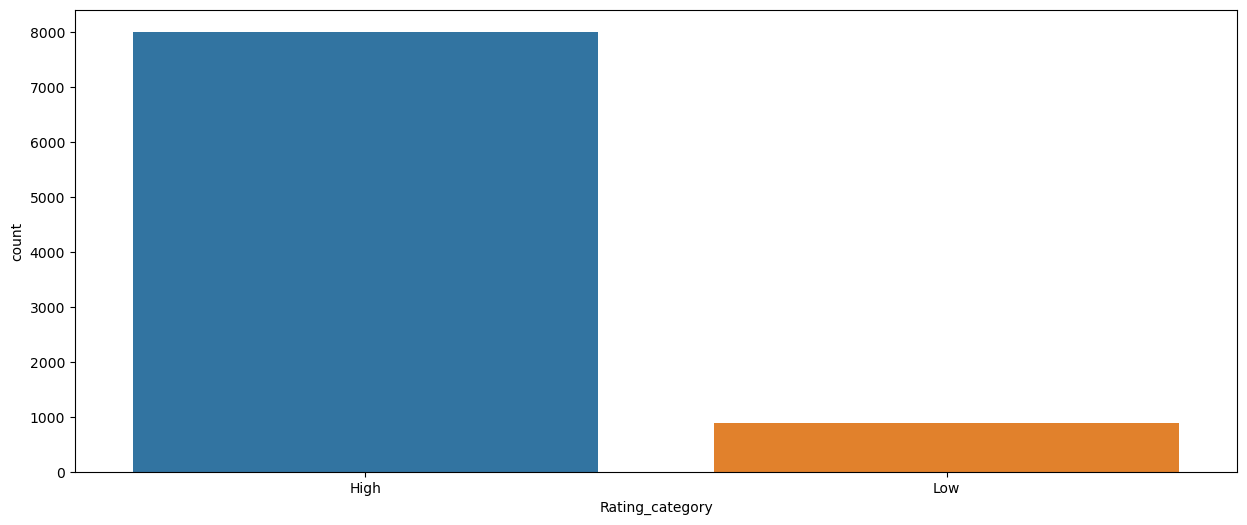

In [17]:
plot.figure(figsize=(15,6))
sns.countplot(data=df , x= 'Rating_category')

*Inferences:
1. The majority of the observations is in  the "High" category
2. In this distributation the count of high category is 8013 and the count of low category is 2345.

### 8. Convert the column "Reviews'' to numeric data type and check    the presence of outliers in the column and  handle the outliers using a  transformation approach


<Axes: xlabel='Reviews'>

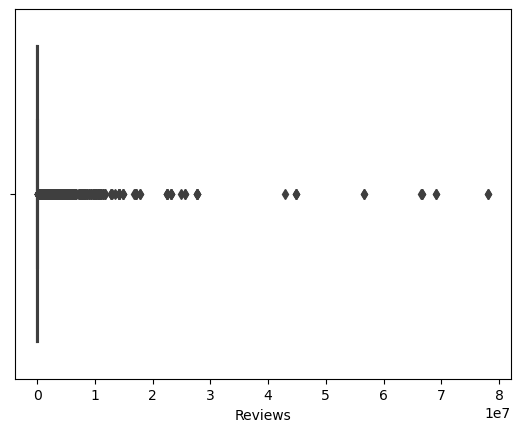

In [18]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
sns.boxplot(data=df,x='Reviews')

In [19]:
# handling outliers by using log transformation
df['Reviews_log'] = np.log1p(df['Reviews'])

<function matplotlib.pyplot.show(close=None, block=None)>

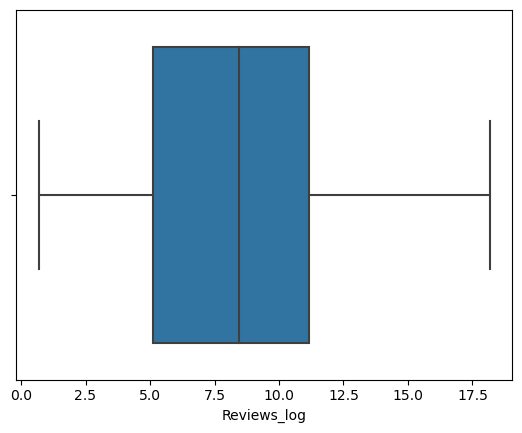

In [20]:
# data after hadling outilers.
sns.boxplot(data=df,x='Reviews_log')
plot.show

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type.



In [21]:
# Replacing M  with 1 million and K with 1 thousand

#df['Size'] = df['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
df['Size'] = df['Size'].replace('M','e6').replace('K','e3')

# Converting size column to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Droping where size='Varies with device'
df = df[df['Size'] != 'Varies with device']

# Converting the size column to numeric after treating non-numeric values
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [22]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   NaN      10,000+  Free     0       Everyone   
1      967   NaN     500,000+  Free     0       Everyone   
2    87510   NaN   5,000,000+  Free     0       Everyone   
3   215644   NaN  50,000,000+  Free     0           Teen   
4      967   NaN     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Rating_category  Reviews_log  
0  4.0.3 and up            High     5.075174  
1  4.0.3 and up            High     6.875232  
2  4.0.3 and up            High    11.379520  
3    4.2 and up            High    12.281389  
4    4.4 and up            High     6.875232

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [23]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [24]:
# replacing the characters.
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')

In [25]:
# converting data type to numeric data type.
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [26]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [27]:
# replacing the characters.
df['Price'] = df['Price'].str.replace('$','').str.replace(',','')

In [28]:
# converting data type to numeric data type.
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

### 12. Drop the columns which you think redundant for the analysis

In [29]:
# droping the columns which is redundant.
df.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [30]:
df.head()

Category  Reviews  Size  Installs  Type  Price Content Rating  \
0  ART_AND_DESIGN      159   NaN     10000  Free    0.0       Everyone   
1  ART_AND_DESIGN      967   NaN    500000  Free    0.0       Everyone   
2  ART_AND_DESIGN    87510   NaN   5000000  Free    0.0       Everyone   
3  ART_AND_DESIGN   215644   NaN  50000000  Free    0.0           Teen   
4  ART_AND_DESIGN      967   NaN    100000  Free    0.0       Everyone   

  Rating_category  Reviews_log  
0            High     5.075174  
1            High     6.875232  
2            High    11.379520  
3            High    12.281389  
4            High     6.875232

### 13.  Encode the categorical columns.

In [31]:
for i in df.select_dtypes(include='object').columns:
        print(df[i].value_counts())
        print('*'*45)

Category
FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64
*****************************************

In [32]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Category'] = encode.fit_transform(df['Category'])

In [33]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Type'] = encode.fit_transform(df['Type'])

In [34]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Content Rating'] = encode.fit_transform(df['Content Rating'])

In [35]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Rating_category'] = encode.fit_transform(df['Rating_category'])

In [36]:
df.head()

Category  Reviews  Size  Installs  Type  Price  Content Rating  \
0         0      159   NaN     10000     0    0.0               1   
1         0      967   NaN    500000     0    0.0               1   
2         0    87510   NaN   5000000     0    0.0               1   
3         0   215644   NaN  50000000     0    0.0               4   
4         0      967   NaN    100000     0    0.0               1   

   Rating_category  Reviews_log  
0                0     5.075174  
1                0     6.875232  
2                0    11.379520  
3                0    12.281389  
4                0     6.875232

### 14. Segregate the target and independent features.

In [37]:
x = df.drop('Rating_category',axis=1)
y = df['Rating_category']

### 15. Split the dataset into train and test.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 , random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.70 , random_state = 42)

### 16. Standardize the data, so that the values are within a particular range.


In [39]:
from sklearn.preprocessing import StandardScaler
std_Scale =StandardScaler()
std_Scale

StandardScaler()

In [40]:
import warnings
warnings.filterwarnings('ignore')
df['Category'] = std_Scale.fit_transform(df[['Category']])
df['Reviews'] = std_Scale.fit_transform(df[['Reviews']])
df['Size'] = std_Scale.fit_transform(df[['Size']])
df['Installs'] = std_Scale.fit_transform(df[['Installs']])
df['Type'] = std_Scale.fit_transform(df[['Type']])
df['Price'] = std_Scale.fit_transform(df[['Price']])
df['Content Rating'] = std_Scale.fit_transform(df[['Content Rating']])
df['Rating_category'] = std_Scale.fit_transform(df[['Rating_category']])
df.head()

Category   Reviews  Size  Installs      Type     Price  Content Rating  \
0  -2.03323 -0.162697   NaN -0.190800 -0.272108 -0.059496       -0.470018   
1  -2.03323 -0.162419   NaN -0.185127 -0.272108 -0.059496       -0.470018   
2  -2.03323 -0.132627   NaN -0.133026 -0.272108 -0.059496       -0.470018   
3  -2.03323 -0.088517   NaN  0.387981 -0.272108 -0.059496        2.480840   
4  -2.03323 -0.162419   NaN -0.189758 -0.272108 -0.059496       -0.470018   

   Rating_category  Reviews_log  
0        -0.331414     5.075174  
1        -0.331414     6.875232  
2        -0.331414    11.379520  
3        -0.331414    12.281389  
4        -0.331414     6.875232

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler()

In [42]:
x[['Reviews','Size','Installs','Price','Category']] = minmax_scaler.fit_transform(x[['Reviews','Size','Installs','Price','Category']])

In [43]:
x[['Reviews','Size','Installs','Price','Category']]

Reviews  Size      Installs  Price  Category
0      2.021538e-06   NaN  9.999000e-06    0.0   0.00000
1      1.235953e-05   NaN  4.999990e-04    0.0   0.00000
2      1.119638e-03   NaN  4.999999e-03    0.0   0.00000
3      2.759054e-03   NaN  5.000000e-02    0.0   0.00000
4      1.235953e-05   NaN  9.999900e-05    0.0   0.00000
...             ...   ...           ...    ...       ...
10834  7.676727e-08   NaN  4.990000e-07    0.0   0.34375
10836  4.733982e-07   NaN  4.999000e-06    0.0   0.34375
10837  3.838364e-08   NaN  9.900000e-08    0.0   0.34375
10839  1.445784e-06   NaN  9.990000e-07    0.0   0.09375
10840  5.096144e-03   NaN  9.999999e-03    0.0   0.56250

[8892 rows x 5 columns]

# Part 2

### 1) Import required libraries and read the dataset.
 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [45]:
df=pd.read_csv('honeyproduction1998-2016.csv')
df.head()

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0     Alabama   16000.0           71   1136000.0    159000.0        0.72   
1     Arizona   55000.0           60   3300000.0   1485000.0        0.64   
2    Arkansas   53000.0           65   3445000.0   1688000.0        0.59   
3  California  450000.0           83  37350000.0  12326000.0        0.62   
4    Colorado   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998

###  2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [46]:
# shape of data
df.shape

(785, 8)

*Inferences:
1) The shape of data is (785,8) 
2) it means there are 785 rows and 8 columns in da

In [47]:
# info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


* The inferencers of data set:
1) The data set contains object,int and float datatypes.
2) The data set didn't contains null values.
3) There are 785 rows and 8 columns in data set.
4) The state variable is object datatype.
5) The yieldpercol and year variables are int datatype remaining variables are float datatype.


### 3) Display the percentage distribution of the data in each year using the pie chart.

<Axes: ylabel='count'>

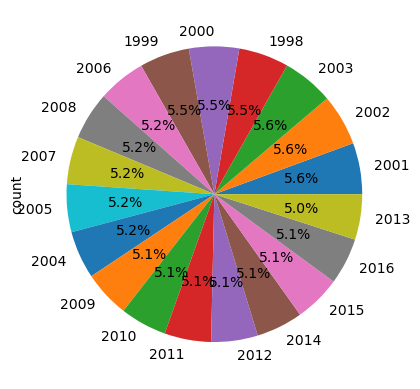

In [48]:
df['year'].value_counts().plot(kind = 'pie',autopct ='%1.1f%%' )

### 4) Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings. 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x600 with 0 Axes>

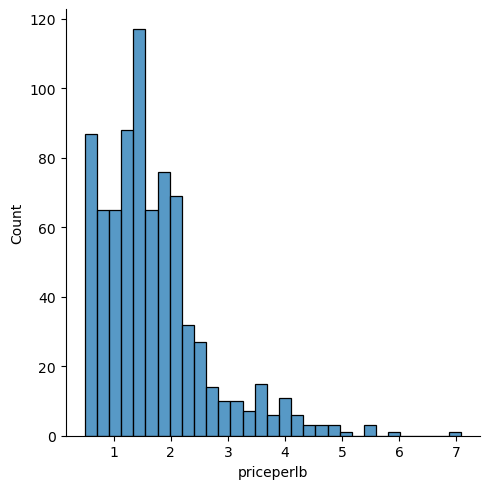

In [49]:
import warnings
warnings.filterwarnings('ignore')
plot.figure(figsize=(15,6))
sns.displot(data=df,x='priceperlb')
plot.show

* Findings:

1) By observing the shape of graph we can considerd that the data is right skewed.
2) The maximum count of priceperlb is near to 120.
3) The minimum count of priceperlb is 5,6 and 7.
4) By observing the spread of data we considerd that there is outliers in data and Outliers can significantly affect the interpretation of the central tendency.

### 5) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot?
 

<Axes: xlabel='numcol', ylabel='prodvalue'>

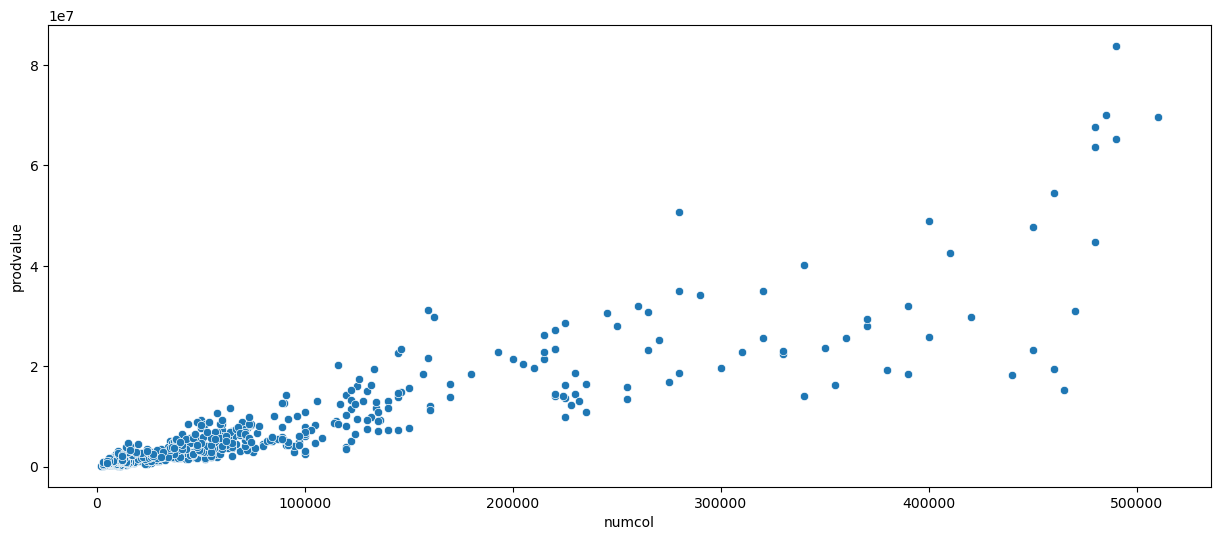

In [50]:
plot.figure(figsize=(15,6))
sns.scatterplot(data=df,x='numcol',y = 'prodvalue')

* Findings:
1) By observing the figure there is positive relationship between two variables numcol and prodval.
2) By observing the tend there is storng relationship from 0 to 200000 and after this point there is no strong relationship.


### 6) Plot and understand the relationship between categorical variable 'year' and a numerical variable prodvalue through boxplot, and write your findings 

<Axes: xlabel='prodvalue'>

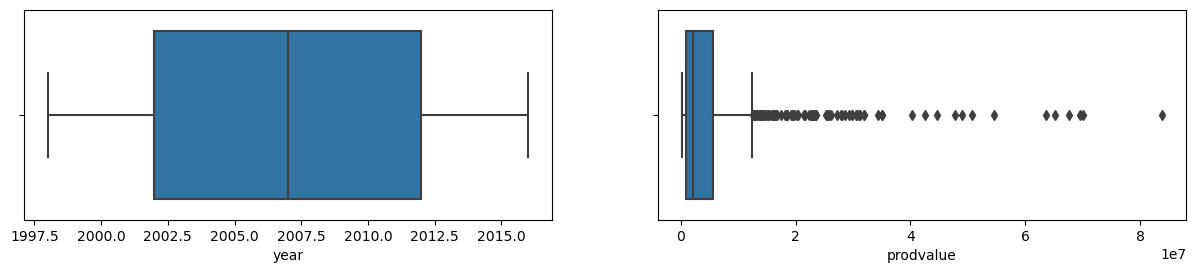

In [51]:
plot.figure(figsize=(15,6))
plot.subplot(2,2,1)
sns.boxplot(data=df , x= 'year')
plot.subplot(2,2,2)
sns.boxplot(data=df , x= 'prodvalue')


* Findings:

1) In box plot we can observe min,max,median and outliers of data.
2) The variable year boxplot shows that the variable year is free from outliers and the median of data is near to 2007.5
3) The data distribution of variable year is normal and there is no outliers.
4) The variable prodvalue boxplot shows that the variable prodvalue contains  more outliers and to perform modling we need to treat the outliers 

### 7) . Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year') 


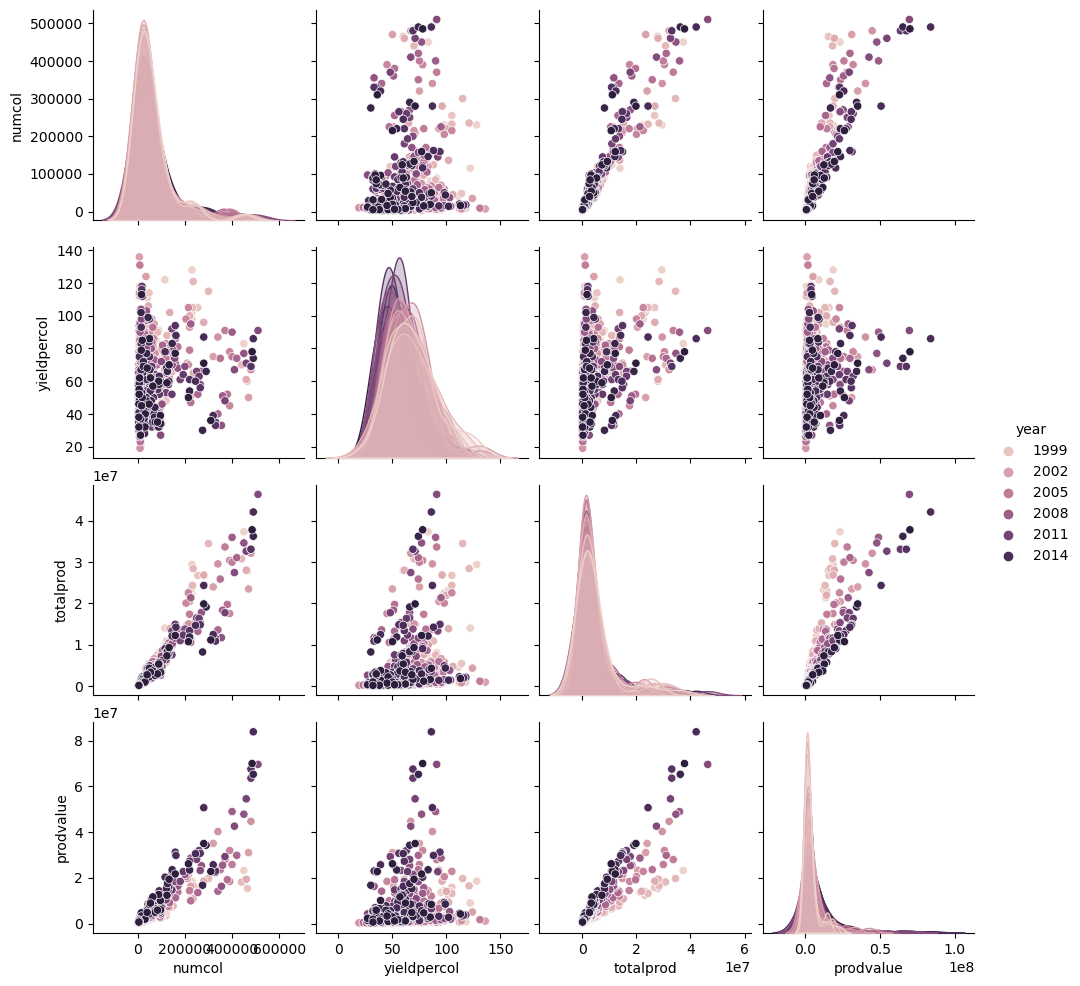

In [52]:
columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
plotdata = df[columns]
sns.pairplot(data=plotdata, hue='year')
plot.show
plot.xticks(rotation = 90)
warnings.filterwarnings('ignore')

### 8) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','toatl prod', 'stocks', 'price per lb', 'prodvalue') 


<Axes: >

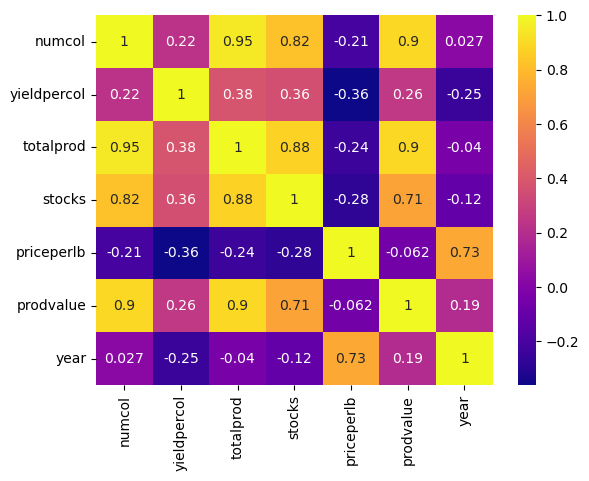

In [53]:
correlation=df.select_dtypes(include='number').corr()
sns.heatmap(data=correlation,annot=True,cmap='plasma')

Inferences:
By observing the correlation chart we observe the positive and negative correlation.

* The positive correlations are:

1) The totalprod and numcol variable has high positive correlation.
2) The stocks and totalprod  variables has high positive correlation.
3) The stocks and numcol variable has positive correlation.
4) The prodvalue and year variables has positive correlation.
5) The totalprod  and  stocks variables has positive correlation.

* The negative correlations are:

1) The priceperlb and yieldpercol variables has high negative correlation.
2) The priceperlb and stocks variables has negative correlation.
3) The priceperlb and total variable has negative correlation. 
4) The year and yieldpercol variables has negative correlation.




